# Introduction

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


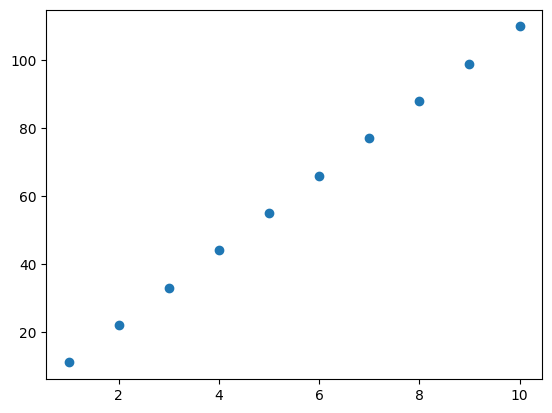

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99, 110])

plt.scatter(X,y);

### The relation between X and y
from the graph we can see that, the relation between X and y is linear. Which means the relation will be a eqation of straight line which can be predicted quite easily by hand.

In [3]:
y == (10*X)+X # This is the relation between X and y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Steps in modelling with TensorFlow
1. Creating a model
2. Compiling a model
3. Fitting a model

---
# Model - 1
---


A model has been created using X from above as the input and y from above as the output. The relation between X and y is (y= 10X+X). This relation is set manually which is not a conventional way to build a machine learning/ deep learning model. The relation between the input and output is what the algorithm is supposed to find.

In [4]:
X = tf.expand_dims(tf.constant(X),axis=-1)
y = tf.constant(y)

tf.random.set_seed(42)
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Dense(1))

my_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

my_model.fit(X,y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 55.2615 - mae: 55.2615
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 54.9490 - mae: 54.9490
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 54.6365 - mae: 54.6365
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 54.3240 - mae: 54.3240
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - loss: 54.0115 - mae: 54.0115


### Model Improvement - 1

In [5]:
my_model_improvement = tf.keras.Sequential()
my_model_improvement.add(tf.keras.layers.Dense(100, activation='relu'))
my_model_improvement.add(tf.keras.layers.Dense(1))

my_model_improvement.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics = ["mae"])

my_model_improvement.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 61.5688 - mae: 61.5688
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 60.8771 - mae: 60.8771
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 60.2041 - mae: 60.2041
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 59.5496 - mae: 59.5496
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 58.9031 - mae: 58.9031
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 58.2727 - mae: 58.2727
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 57.6447 - mae: 57.6447
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 57.0156 - mae: 57.0156
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 56.3725 - mae: 56.3725
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 55.7127 - mae: 55.7127
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 55.0314 - mae: 55.0314
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 54.3217 - mae: 54.3217
Epoch 13/100
1/1 ━━━━━━━━━━

In [6]:
X_test = tf.constant([5])
X_test = tf.expand_dims(tf.constant(X_test),axis=-1)
print(X_test)
my_model_improvement.predict(X_test)

tf.Tensor([[5]], shape=(1, 1), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[56.458256]], dtype=float32)

---
# Model - 2
---

For model building, a dataset has been created using ```X=tf.range(1,100,2)``` and ```y=(X**2)+X```. In tf.range(1,100,2), 1 is the starting value, 100 is the ending value and 2 is the step-size. This time, we will build a model by using training-validation-test split. The steps are coded below.

### Creating the dataset

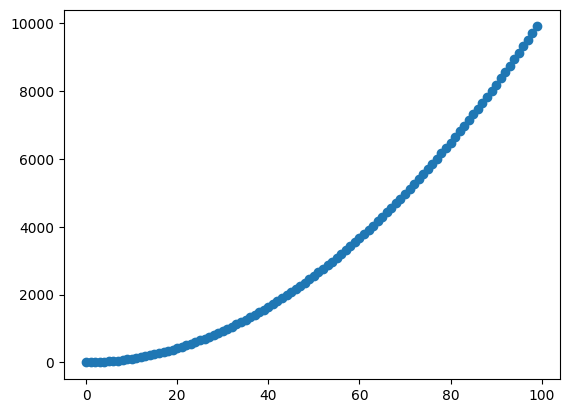

In [86]:
X = tf.range(0,100,1)
y = (X**2)+X

X = tf.expand_dims(tf.constant(X),axis=-1)

plt.scatter(X,y);

### Splitting the dataset into Train & Test

In [87]:
precent_80 = int(len(X)*0.8)

X_train = X[:precent_80]
y_train = y[:precent_80]

X_test = X[precent_80:]
y_test = y[precent_80:]

### Plotting the train & test data

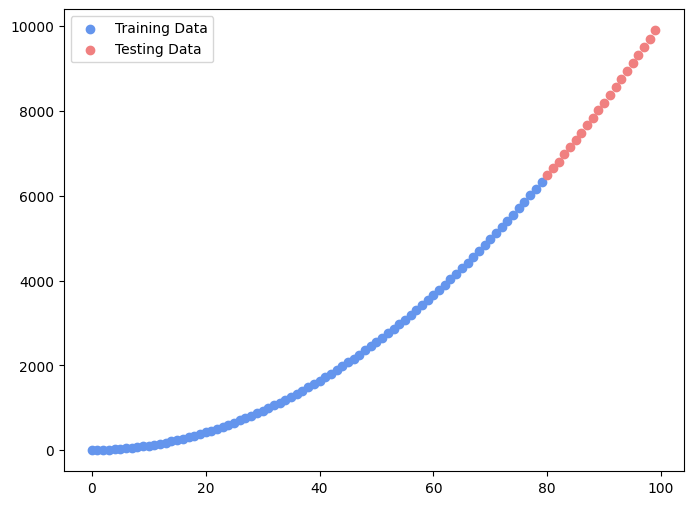

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, c="cornflowerblue", label="Training Data")
plt.scatter(X_test, y_test, c="lightcoral", label="Testing Data")

plt.legend();

### Building the model

In [89]:
X[0], y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>)

In [133]:
tf.random.set_seed(42)

my_model_2 = tf.keras.Sequential(name="Model-2")
my_model_2.add(tf.keras.layers.Dense(16, input_shape=[1],name="input_layer"))
my_model_2.add(tf.keras.layers.Dense(1, input_shape=[1],name="output_layer"))

my_model_2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = [tf.keras.metrics.MeanAbsoluteError()])

my_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model-2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

*  **Trainable Parameters:** The parameters which the model updates while it is in the training process.
*  **Non-trainable Parameters:** The parameters that does not update during the training process. (Happens with transfer learning)

<a href="https://stackoverflow.com/questions/47312219/what-is-the-definition-of-a-non-trainable-parameter">***Google for more***</a>

---

### Fitting the model

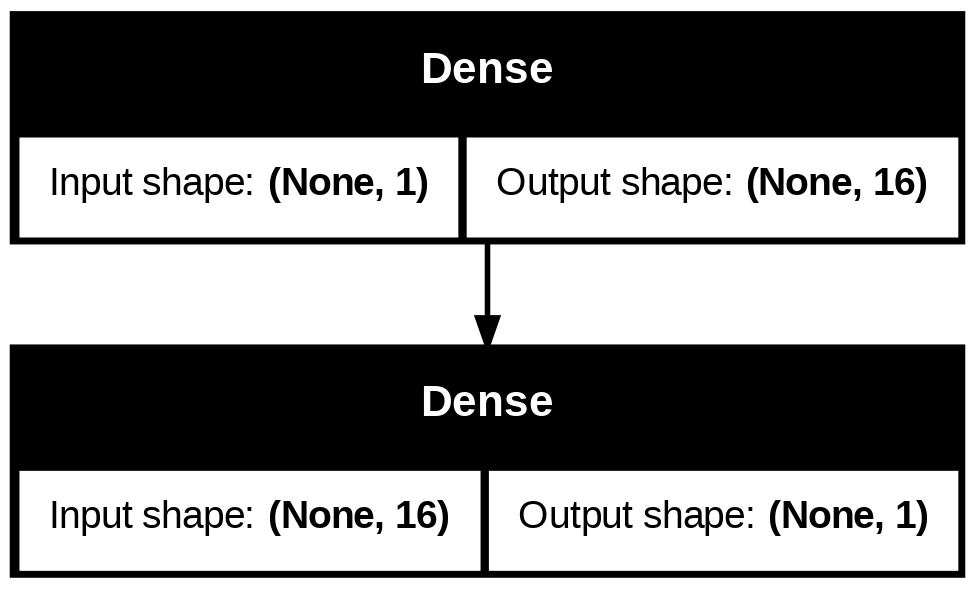

In [134]:
from tensorflow.keras.utils import plot_model
plot_model(model=my_model_2, show_shapes=True)

In [135]:
my_model_2.fit(X,y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3250.0127 - mean_absolute_error: 3250.0127  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1381.1870 - mean_absolute_error: 1381.1870 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2028.3353 - mean_absolute_error: 2028.3353 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1303.3009 - mean_absolute_error: 1303.3009 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1928.0813 - mean_absolute_error: 1928.0813
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1609.1401 - mean_absolute_error: 1609.1401  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1252.5762 - mean_absolute_error: 1252.5762 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1899.8453 - mean_absolute_error: 1899.8453 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1482.4349 - mean_absolute_error: 1482.4349 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1230.5990 - mean_absolute_error

### Making a function to compare between true value and Predicted Value

In [155]:
def makeComparison(y_pred, y_test=y_test, X_test=X_test):
  print("True Value VS Predicted Value")
  print("#############################")
  for i in range(len(y_pred)):
    print("True Value:",y_test[i].numpy(),
          "|| Predicted Value:",y_pred[i][0])

In [156]:
y_pred = my_model_2.predict(X_test)
makeComparison(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
True Value VS Predicted Value
#############################
True Value: 6480 || Predicted Value: 10963.673
True Value: 6642 || Predicted Value: 11104.384
True Value: 6806 || Predicted Value: 11245.096
True Value: 6972 || Predicted Value: 11385.807
True Value: 7140 || Predicted Value: 11526.518
True Value: 7310 || Predicted Value: 11667.229
True Value: 7482 || Predicted Value: 11807.94
True Value: 7656 || Predicted Value: 11948.65
True Value: 7832 || Predicted Value: 12089.362
True Value: 8010 || Predicted Value: 12230.074
True Value: 8190 || Predicted Value: 12370.784
True Value: 8372 || Predicted Value: 12511.496
True Value: 8556 || Predicted Value: 12652.207
True Value: 8742 || Predicted Value: 12792.918
True Value: 8930 || Predicted Value: 12933.63
True Value: 9120 || Predicted Value: 13074.341
True Value: 9312 || Predicted Value: 13215.053
True Value: 9506 || Predicted Value: 13355.763
True Value: 9702 || Predicted Value: 13496.475
True Value: 

In [147]:
def plotPredictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = y_pred):
  plt.figure(figsize=(8,6))
  plt.scatter(train_data, train_labels, c="cornflowerblue", label="Training Data")
  plt.scatter(test_data, test_labels, c="lightcoral", label="Testing Data")
  plt.scatter(test_data, predictions, c="darkorange", label="Test Predictions")
  plt.legend();

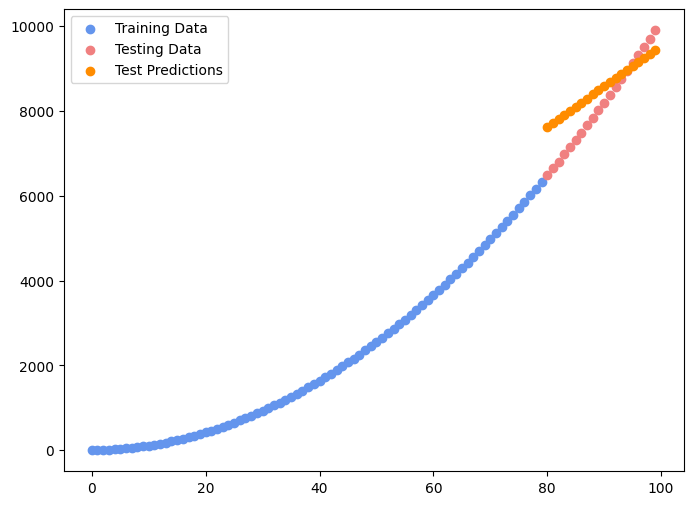

In [148]:
  plotPredictions();

In [113]:
MAE = np.mean(abs(y_test - y_pred))
MSE = np.mean((y_test - y_pred)**2)

print(MAE)
print(MSE)

1013.905
1475732.9


### Tips on improving a model:
* Expand the dataset
* Make the model larger (Add more layers)
* Train for longer (if not overfits)
---


---
# Model - 3
---


In [165]:
tf.random.set_seed(42)

my_model_3 = tf.keras.Sequential(name="Model-3")
my_model_3.add(tf.keras.layers.Dense(16, input_shape=[1],name="input_layer"))
my_model_3.add(tf.keras.layers.Dense(1, input_shape=[1],name="output_layer"))

my_model_3.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics = [tf.keras.metrics.MeanSquaredError()])

my_model_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model-3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

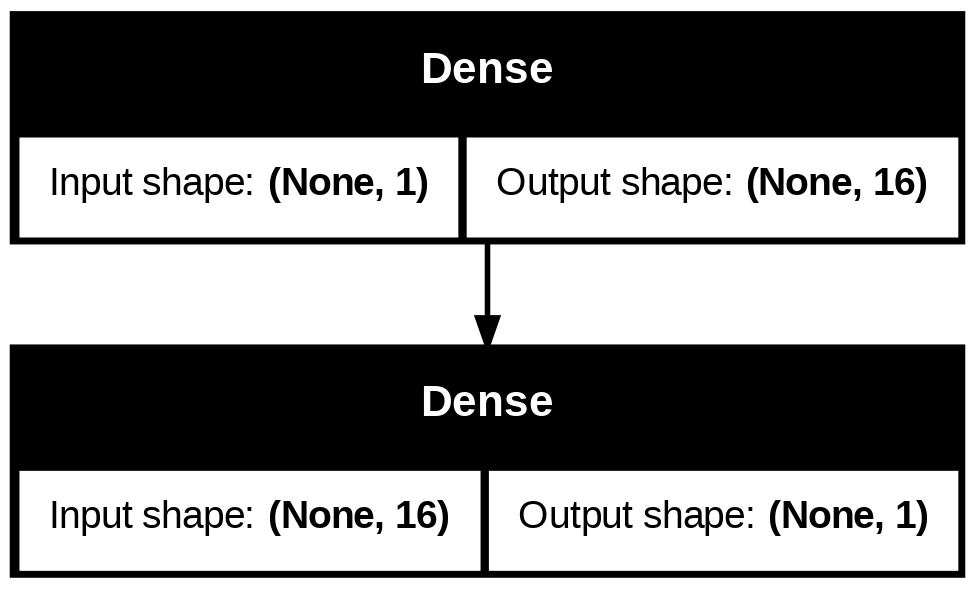

In [166]:
from tensorflow.keras.utils import plot_model
plot_model(model=my_model_3, show_shapes=True)

In [167]:
my_model_3.fit(X,y, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3348.4028 - mean_squared_error: 20499330.0000 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3346.7681 - mean_squared_error: 20482692.0000 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3345.1196 - mean_squared_error: 20465920.0000 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3343.4526 - mean_squared_error: 20448972.0000 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3341.7666 - mean_squared_error: 20431836.0000 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3340.0598 - mean_squared_error: 20414498.0000 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3338.3311 - mean_squared_error: 20396940.0000
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3336.5786 - mean_squared_error: 20379158.0000 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3334.8015 - mean_squared_error: 20361130.0000
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3332

In [168]:
y_pred = my_model_3.predict(X_test)
makeComparison(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
True Value VS Predicted Value
#############################
True Value: 6480 || Predicted Value: 5813.746
True Value: 6642 || Predicted Value: 5886.077
True Value: 6806 || Predicted Value: 5958.4077
True Value: 6972 || Predicted Value: 6030.7383
True Value: 7140 || Predicted Value: 6103.0693
True Value: 7310 || Predicted Value: 6175.4004
True Value: 7482 || Predicted Value: 6247.7314
True Value: 7656 || Predicted Value: 6320.0615
True Value: 7832 || Predicted Value: 6392.3926
True Value: 8010 || Predicted Value: 6464.7236
True Value: 8190 || Predicted Value: 6537.054
True Value: 8372 || Predicted Value: 6609.3853
True Value: 8556 || Predicted Value: 6681.716
True Value: 8742 || Predicted Value: 6754.047
True Value: 8930 || Predicted Value: 6826.378
True Value: 9120 || Predicted Value: 6898.7085
True Value: 9312 || Predicted Value: 6971.039
True Value: 9506 || Predicted Value: 7043.37
True Value: 9702 || Predicted Value: 7115.701
True Value: 9900 ||

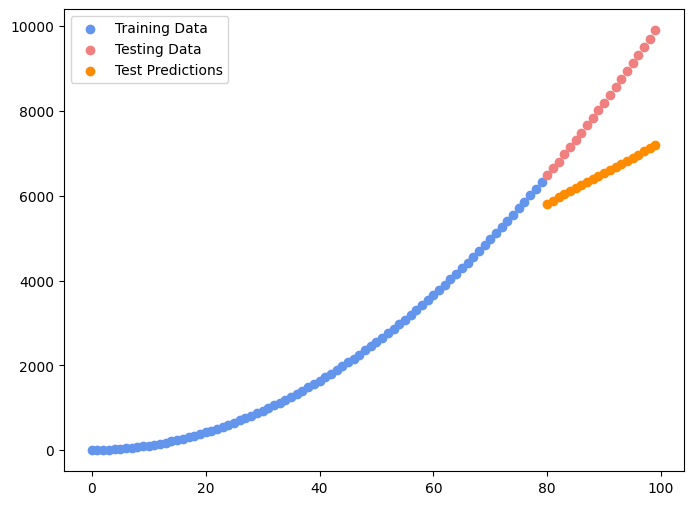

In [169]:
plotPredictions(predictions=y_pred);

### Why does Model-3 shows worse result than Model-2 even after building the model with higher epochs?
--> Model-3 has too much epochs with caused the model to overfit. Overfitting causes the model perfom worse then model-3.